In [55]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from matplotlib import style
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [115]:
#data_csv = pd.read_csv('', low_memory=False, header=None, nrows=20000)
data_csv = pd.read_csv('/home/rajeev/Documents/Project/logs_test.csv', low_memory=False)

In [116]:
# assign columns to data set
data_csv.columns = ['Time','Destination','Rule','Interface_Direction','Policy_Rule_UID','Type','Interface','Policy_Date',
                    'Service_ID','Action','ID','Interface_Name','Layer_Name','Source_Port','Product_Family','Blade',
                    'Sequence_Number','Source_Zone','Source','Access_Rule_Name','Policy_Name','id_generated_by_indexer',
                    'Destination_Zone','Database_Tag','Log_Server_Origin','Service','Origin','Marker','Destination_Port',
                    'Domain','Protocol','logid','first','Policy_Management','Xlate_(NAT)_Source_IP','NAT_Additional_Rule_Number',
                    'nat_rule_uid','Xlate_(NAT)_Source_Port','NAT_Rule_Number','Xlate_(NAT)_Destination_Port','dst_domain_name',
                    'dst_uo_name','dst_uo_icon','tcp_flags','tcp_packet_out_of_state','Resource','icmp_type','icmp','icmp_code',
                    'Direction_of_Connection','log_delay','action_reason','src_uo_icon','src_uo_name','lastupdatetime',
                    'Message_Information','sys_message','Performance_Impact','sub_policy_uid','Protection_ID','Confidence_Level',
                    'Attack_Information','Industry_Reference','Attack_Name','Severity','Threat_Profile','Protection_Type','Suppressed_Logs',
                    'Sub_Policy_Name','Protection_Name','Total_Logs','dce-rpc_interface_uuid-2','dce-rpc_interface_uuid-1',
                    'dce-rpc_interface_uuid-3','dce-rpc_interface_uuid','Xlate_(NAT)_Destination_IP','rpc_prog','Reason','precise_error',
                    'Proxied_Source_IP','source_object','Description','fw_message','source','Received_Bytes','packet_capture_time','Method',
                    'Threat_Prevention_Policy_Date','Incident_ID','Vendor_List','HTTP_Host','Sent_Bytes','Scope','Threat_Prevention_Rule_ID',
                    'Threat_Prevention_Policy','Log_ID','Packet_Capture_Name','Session_ID','Malware_Action','Packet_Capture','Scheme',
                    'validation_log','Vpn_Feature_Name','dn','instruction','Email_Session_ID','Information','Email_Control','update_service',
                    'version','comment','Status','Peer_Gateway','encryption_failure','reject_category','encryption_fail_reason','Tags',
                    'description_url','reject_id_kid','Execution','ser_agent_kid','User_Agent','Malware_Family','Credential_Access',
                    'Collection','Discovery','Initial_Access','inspection_settings_log','streaming_engine','src_domain_name','Methods',
                    'Session_ID','community','User','ike','cookiei','cookier','srckeyid','msgid','dstkeyid','ike_ids','failure_impact',
                    'more_sources','User_Domain','Device_ID','Duration','Event_Type','Mobile_Access_Category','Login_TimeStamp',
                    'Source_OS','control_log_type','failed_login_factor_num','Host_Name','Domain_Name','os_build','Tunnel_Protocol',
                    'User_Group','Login_Option','session_timeout','Office_Mode_IP','Device','Machine_Name','MAC_Address','Client_Version',
                    'Client_Name','Host_IP','Client_Build','OS_Version','OS_Bits','OS_Name','os_edition','Auth_Encryption_Methods','connection_uid',
                    'start_time']


In [4]:

print(data_csv.shape)
data_csv.head()

(251554, 174)


Time     Destination   Rule Interface_Direction  \
0  July 18, 2023 1:18:41 PM  20.202.255.225  5.294             inbound   
1  July 18, 2023 1:18:41 PM    192.168.5.37  5.680             inbound   
2  July 18, 2023 1:18:41 PM  192.168.224.36  5.680             inbound   
3  July 18, 2023 1:18:41 PM    52.166.80.90  5.294             inbound   
4  July 18, 2023 1:18:41 PM   12.10.193.196  5.151             inbound   

                        Policy_Rule_UID Type Interface           Policy_Date  \
0  b74e79b2-cc95-4006-9115-258b6b2cd986  RST      eth1  2023-04-28T16:57:15Z   
1  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
2  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
3  b74e79b2-cc95-4006-9115-258b6b2cd986  FIN      eth1  2023-04-28T16:57:15Z   
4  78799b30-d542-4d4e-a391-baa891bf1091  RST      eth1  2023-04-28T16:29:24Z   

       Service_ID  Action  ... Client_Name Host_IP Client_Build  OS_Version  \
0            http  Detect  ...         NaN     NaN          NaN         NaN   
1            snmp  Detect  ...         NaN     NaN          NaN         NaN   
2            snmp  Detect  ...         NaN     NaN          NaN         NaN   
3           https  Detect  ...         NaN     NaN          NaN         NaN   
4  tcp-high-ports  Detect  ...         NaN     NaN          NaN         NaN   

  OS_Bits OS_Name  os_edition Auth_Encryption_Methods connection_uid  \
0     NaN     NaN         NaN                     NaN            NaN   
1     NaN     NaN         NaN                     NaN            NaN   
2     NaN     NaN         NaN                     NaN            NaN   
3     NaN     NaN         NaN                     NaN            NaN   
4     NaN     NaN         NaN                     NaN            NaN   

  start_time  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 174 columns]

In [8]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 174 entries, Time to start_time
dtypes: bool(2), float64(77), int64(1), object(94)
memory usage: 330.6+ MB


In [21]:
data_csv.Action.value_counts()

Action
Drop       118230
Accept      57905
Detect      48479
Prevent     26940
Name: count, dtype: int64

In [22]:
data_csv.Action.replace({'Detect':'Drop'},inplace=True)
data_csv.Action.replace({'Prevent':'Drop'},inplace=True)

In [23]:
action_count = data_csv.Action.value_counts()
action_count

Action
Drop      193649
Accept     57905
Name: count, dtype: int64

In [65]:
data_csv.tcp_flags.replace({'SYN':1},inplace=True)
data_csv.tcp_flags.replace({'ACK':2},inplace=True)
data_csv.tcp_flags.replace({'URG':3},inplace=True)
data_csv.tcp_flags.replace({'PSH':4},inplace=True)
data_csv.tcp_flags.replace({'FIN-ACK':5},inplace=True)
data_csv.tcp_flags.replace({'FIN-PUSH-ACK':6},inplace=True)
data_csv.tcp_flags.replace({'PUSH-ACK':7},inplace=True)
data_csv.tcp_flags.replace({'RST-ACK':8},inplace=True)
data_csv.tcp_flags.replace({'RST':9},inplace=True)

In [58]:
data_csv.Interface.value_counts()

Interface
eth1            194503
bond0.310        12919
WAN               7126
bond0.320         6418
DMZ               5128
bond0.800         4954
eth2              4061
bond0.400         2680
eth0              2526
LANBOND0.502      2183
bond0.200         2120
bond0.700         1756
bond0.500         1455
LANBOND0.700      1277
bond0.333         1169
LAN4               581
LANBOND0.333       340
LANBOND0.322       132
bond0.502          106
LANBOND0.800        78
bond0.322           35
eth3                 7
Name: count, dtype: int64

In [12]:
#This not neccessary unless you want to read several files
for topsrc in ['data_csv']:
    src = data_csv.sort_values('Destination', ascending = False).head(10)

print(src)

                            Time                           Destination  Rule  \
248091  July 18, 2023 1:16:38 PM  updates.opendns.com (146.112.255.155  5.21   
124462  July 18, 2023 2:15:10 PM  updates.opendns.com (146.112.255.155  5.31   
142104  July 18, 2023 1:31:38 PM  updates.opendns.com (146.112.255.155  5.21   
142107  July 18, 2023 1:31:38 PM  updates.opendns.com (146.112.255.155  5.21   
193405  July 18, 2023 1:45:06 PM  updates.opendns.com (146.112.255.155  5.31   
218641  July 18, 2023 2:31:26 PM  updates.opendns.com (146.112.255.155  5.31   
218639  July 18, 2023 2:31:26 PM  updates.opendns.com (146.112.255.155  5.31   
170517  July 18, 2023 1:36:38 PM  updates.opendns.com (146.112.255.155  5.21   
170521  July 18, 2023 1:36:38 PM  updates.opendns.com (146.112.255.155  5.21   
147313  July 18, 2023 1:33:11 PM  updates.opendns.com (146.112.255.155  5.31   

       Interface_Direction           Policy_Date Service_ID  Source_Port  \
248091             inbound  2023-04-28T16:5

In [8]:
sns.barplot(x=action_count.index, y=action_count)
plt.xlabel('Action')
plt.ylabel('Count');

NameError: name 'action_count' is not defined

In [112]:
data_csv.dropna(inplace=True)

In [113]:
data_csv.isnull().sum()

Time                       0.0
Destination                0.0
Rule                       0.0
Interface_Direction        0.0
Policy_Rule_UID            0.0
                          ... 
OS_Name                    0.0
os_edition                 0.0
Auth_Encryption_Methods    0.0
connection_uid             0.0
start_time                 0.0
Length: 174, dtype: float64

In [134]:
data_csv.Source.value_counts(accuracy_score)

Source
89.248.165.100     0.059800
192.168.175.69     0.051369
192.168.175.133    0.044265
192.168.150..5     0.027036
192.168.164.36     0.020342
                     ...   
64.62.197.31       0.000004
89.147.111.150     0.000004
35.203.210.32      0.000004
184.105.139.124    0.000004
36.35.196.137      0.000004
Name: proportion, Length: 6065, dtype: float64

In [124]:
#Feature Engineering

In [67]:
data_csv.tail()

Time      Destination   Rule Interface_Direction  \
251549  July 18, 2023 1:15:30 PM    192.168.244.5  5.480             inbound   
251550  July 18, 2023 1:15:30 PM    20.150.37.230  5.294             inbound   
251551  July 18, 2023 1:15:30 PM    (192.168.96.6  5.900             inbound   
251552  July 18, 2023 1:15:30 PM   52.182.143.210  5.128             inbound   
251553  July 18, 2023 1:15:30 PM  192.168.175.135  5.440             inbound   

                             Policy_Rule_UID        Type  Interface  \
251549  a6416ccd-b460-4599-b87a-c8af18a05dc2  Connection  bond0.320   
251550  b74e79b2-cc95-4006-9115-258b6b2cd986      Reject       eth1   
251551  2c2970b9-92c5-4506-b0d5-8dcd11c9a304  Connection  bond0.200   
251552  5506278c-3493-4d04-b153-546a06332e04  Connection       eth1   
251553  f65155bc-bc93-4e34-8faf-792b02e5f0a3  Connection       eth1   

                 Policy_Date  Service_ID  Action  ... Client_Name Host_IP  \
251549  2023-04-28T16:29:24Z  domain-udp  Accept  ...         NaN     NaN   
251550  2023-04-28T16:57:15Z       https    Drop  ...         NaN     NaN   
251551  2023-04-28T16:29:24Z        snmp  Accept  ...         NaN     NaN   
251552  2023-04-28T16:57:15Z       https  Accept  ...         NaN     NaN   
251553  2023-04-28T16:57:15Z    TCP_5985  Accept  ...         NaN     NaN   

       Client_Build  OS_Version OS_Bits OS_Name  os_edition  \
251549          NaN         NaN     NaN     NaN         NaN   
251550          NaN         NaN     NaN     NaN         NaN   
251551          NaN         NaN     NaN     NaN         NaN   
251552          NaN         NaN     NaN     NaN         NaN   
251553          NaN         NaN     NaN     NaN         NaN   

       Auth_Encryption_Methods connection_uid start_time  
251549                     NaN            NaN        NaN  
251550                     NaN            NaN        NaN  
251551                     NaN            NaN        NaN  
251552                     NaN            NaN        NaN  
251553                     NaN            NaN        NaN  

[5 rows x 174 columns]

In [66]:
data_csv.head()

Time     Destination   Rule Interface_Direction  \
0  July 18, 2023 1:18:41 PM  20.202.255.225  5.294             inbound   
1  July 18, 2023 1:18:41 PM    192.168.5.37  5.680             inbound   
2  July 18, 2023 1:18:41 PM  192.168.224.36  5.680             inbound   
3  July 18, 2023 1:18:41 PM    52.166.80.90  5.294             inbound   
4  July 18, 2023 1:18:41 PM   12.10.193.196  5.151             inbound   

                        Policy_Rule_UID Type Interface           Policy_Date  \
0  b74e79b2-cc95-4006-9115-258b6b2cd986  RST      eth1  2023-04-28T16:57:15Z   
1  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
2  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
3  b74e79b2-cc95-4006-9115-258b6b2cd986  FIN      eth1  2023-04-28T16:57:15Z   
4  78799b30-d542-4d4e-a391-baa891bf1091  RST      eth1  2023-04-28T16:29:24Z   

       Service_ID Action  ... Client_Name Host_IP Client_Build  OS_Version  \
0            http   Drop  ...         NaN     NaN          NaN         NaN   
1            snmp   Drop  ...         NaN     NaN          NaN         NaN   
2            snmp   Drop  ...         NaN     NaN          NaN         NaN   
3           https   Drop  ...         NaN     NaN          NaN         NaN   
4  tcp-high-ports   Drop  ...         NaN     NaN          NaN         NaN   

  OS_Bits OS_Name  os_edition Auth_Encryption_Methods connection_uid  \
0     NaN     NaN         NaN                     NaN            NaN   
1     NaN     NaN         NaN                     NaN            NaN   
2     NaN     NaN         NaN                     NaN            NaN   
3     NaN     NaN         NaN                     NaN            NaN   
4     NaN     NaN         NaN                     NaN            NaN   

  start_time  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 174 columns]

In [119]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 174 entries, Time to start_time
dtypes: bool(2), float64(77), int64(1), object(94)
memory usage: 330.6+ MB


In [138]:
data_csv.src_uo_name.value_counts()

src_uo_name
Russia                   2207
Azure Public Services      45
Ukraine                    25
Kazakhstan                 18
Azerbaijan                  8
Uzbekistan                  1
Kyrgyzstan                  1
Name: count, dtype: int64

In [80]:
counrty_count = data_csv.src_uo_name.value_counts()
counrty_count

src_uo_name
Russia                   2207
Azure Public Services      45
Ukraine                    25
Kazakhstan                 18
Azerbaijan                  8
Uzbekistan                  1
Kyrgyzstan                  1
Name: count, dtype: int64

In [81]:
sns.barplot(y=counrty_count.index, x=counrty_count)
plt.xlabel('Action')
plt.ylabel('Count');

In [25]:
data_csv["Action"].value_counts()

Action
Drop      193649
Accept     57905
Name: count, dtype: int64

In [63]:
lb_make = LabelEncoder()
data_csv["type_code"] = lb_make.fit_transform(data_csv["Interface"])
data_csv["type_code"].value_counts()

type_code
0    218298
1     19844
2      3849
3      3751
5      3033
4      2120
6       581
7        78
Name: count, dtype: int64

In [91]:
data_csv.Interface.replace({'eth1':0},inplace=True)
data_csv.Interface.replace({'WAN':0},inplace=True)
data_csv.Interface.replace({'DMZ':0},inplace=True)
data_csv.Interface.replace({'eth2':0},inplace=True)
data_csv.Interface.replace({'bond0.310':1},inplace=True)
data_csv.Interface.replace({'bond0.320':1},inplace=True)
data_csv.Interface.replace({'bond0.800':7},inplace=True)
data_csv.Interface.replace({'bond0.400':3},inplace=True)
data_csv.Interface.replace({'LANBOND0.502':4},inplace=True)
data_csv.Interface.replace({'bond0.200':5},inplace=True)
data_csv.Interface.replace({'bond0.700':6},inplace=True)
data_csv.Interface.replace({'bond0.500':4},inplace=True)
data_csv.Interface.replace({'LANBOND0.700':6},inplace=True)
data_csv.Interface.replace({'LAN4':6},inplace=True)
data_csv.Interface.replace({'LANBOND0.333':1},inplace=True)
data_csv.Interface.replace({'LANBOND0.322':1},inplace=True)
data_csv.Interface.replace({'bond0.502':4},inplace=True)
data_csv.Interface.replace({'LANBOND0.800':7},inplace=True)
data_csv.Interface.replace({'bond0.322':1},inplace=True)
data_csv.Interface.replace({'eth0':0},inplace=True)
data_csv.Interface.replace({'bond0.333':3},inplace=True)
data_csv.Interface.replace({'eth3':4},inplace=True)


AttributeError: 'DataFrame' object has no attribute 'Interface'

In [92]:
data_csv.Interface.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Interface'

In [93]:
data_csv.type_code.value_counts()

type_code
0    218298
1     19844
2      3849
3      3751
5      3033
4      2120
6       581
7        78
Name: count, dtype: int64

In [185]:
data_csv.shape

(0, 175)

In [95]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 175 entries, Time to type_code
dtypes: bool(2), float64(77), int64(2), object(94)
memory usage: 332.5+ MB


In [12]:
data_csv['tcp_flags'].value_counts()



tcp_flags
SYN             170348
ACK              43911
URG              28049
PSH               9063
FIN-ACK             80
FIN-PUSH-ACK        69
PUSH-ACK            21
RST-ACK              7
RST                  6
Name: count, dtype: int64

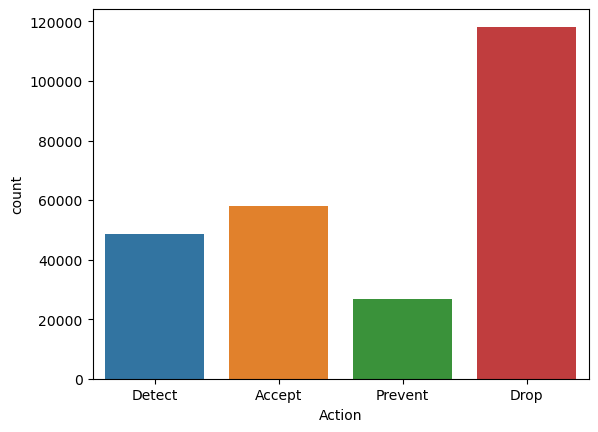

In [90]:
sns.countplot(x='Action', data=data_csv);

In [66]:
test = data_csv.groupby('Action').head(2).reset_index(drop=True)

In [70]:
dummy_data = (data_csv.sort_values(['Action','Destination'], ascending=[True, False])
         .groupby('Action', group_keys=False)
         .apply(lambda x: x.head(int(len(x) / 10))))

In [71]:
dummy_data

Time                            Destination   Rule  \
34911  July 18, 2023 1:58:15 PM  updates.opendns.com (146.112.255.155)  5.210   
34912  July 18, 2023 1:58:15 PM  updates.opendns.com (146.112.255.155)  5.210   
48056  July 18, 2023 2:03:15 PM  updates.opendns.com (146.112.255.155)  5.210   
48057  July 18, 2023 2:03:15 PM  updates.opendns.com (146.112.255.155)  5.210   
58832  July 18, 2023 2:39:53 PM  updates.opendns.com (146.112.255.155)  5.210   
...                         ...                                    ...    ...   
67661  July 18, 2023 2:07:51 PM                         52.239.212.164  5.294   
67872  July 18, 2023 2:07:48 PM                         52.239.212.164  5.294   
67958  July 18, 2023 2:07:46 PM                         52.239.212.164  5.294   
68017  July 18, 2023 2:07:45 PM                         52.239.212.164  5.294   
68061  July 18, 2023 2:07:44 PM                         52.239.212.164  5.294   

      Interface_Direction                       Policy_Rule_UID    Type  \
34911             inbound  286db76a-7bc3-4e92-bc4f-8ad42f3e75bc     RST   
34912             inbound  286db76a-7bc3-4e92-bc4f-8ad42f3e75bc     RST   
48056             inbound  286db76a-7bc3-4e92-bc4f-8ad42f3e75bc     RST   
48057             inbound  286db76a-7bc3-4e92-bc4f-8ad42f3e75bc     RST   
58832             inbound  286db76a-7bc3-4e92-bc4f-8ad42f3e75bc     RST   
...                   ...                                   ...     ...   
67661             inbound  b74e79b2-cc95-4006-9115-258b6b2cd986  Reject   
67872             inbound  b74e79b2-cc95-4006-9115-258b6b2cd986  Reject   
67958             inbound  b74e79b2-cc95-4006-9115-258b6b2cd986  Reject   
68017             inbound  b74e79b2-cc95-4006-9115-258b6b2cd986  Reject   
68061             inbound  b74e79b2-cc95-4006-9115-258b6b2cd986  Reject   

      Interface           Policy_Date Service_ID   Action  ... Client_Name  \
34911      eth1  2023-04-28T16:57:15Z      https   Accept  ...         NaN   
34912      eth1  2023-04-28T16:57:15Z      https   Accept  ...         NaN   
48056      eth1  2023-04-28T16:57:15Z      https   Accept  ...         NaN   
48057      eth1  2023-04-28T16:57:15Z      https   Accept  ...         NaN   
58832      eth1  2023-04-28T16:57:15Z      https   Accept  ...         NaN   
...         ...                   ...        ...      ...  ...         ...   
67661      eth1  2023-04-28T16:57:15Z      https  Prevent  ...         NaN   
67872      eth1  2023-04-28T16:57:15Z      https  Prevent  ...         NaN   
67958      eth1  2023-04-28T16:57:15Z      https  Prevent  ...         NaN   
68017      eth1  2023-04-28T16:57:15Z      https  Prevent  ...         NaN   
68061      eth1  2023-04-28T16:57:15Z      https  Prevent  ...         NaN   

      Host_IP Client_Build  OS_Version OS_Bits OS_Name  os_edition  \
34911     NaN          NaN         NaN     NaN     NaN         NaN   
34912     NaN          NaN         NaN     NaN     NaN         NaN   
48056     NaN          NaN         NaN     NaN     NaN         NaN   
48057     NaN          NaN         NaN     NaN     NaN         NaN   
58832     NaN          NaN         NaN     NaN     NaN         NaN   
...       ...          ...         ...     ...     ...         ...   
67661     NaN          NaN         NaN     NaN     NaN         NaN   
67872     NaN          NaN         NaN     NaN     NaN         NaN   
67958     NaN          NaN         NaN     NaN     NaN         NaN   
68017     NaN          NaN         NaN     NaN     NaN         NaN   
68061     NaN          NaN         NaN     NaN     NaN         NaN   

      Auth_Encryption_Methods connection_uid start_time  
34911                     NaN            NaN        NaN  
34912                     NaN            NaN        NaN  
48056                     NaN            NaN        NaN  
48057                     NaN            NaN        NaN  
58832                     NaN            NaN        NaN  
...                       .

In [69]:
test_data = data_csv.groupby(['Action','Destination','src_uo_name']).head(2).reset_index(drop=True)
test_data

Time     Destination  Rule Interface_Direction  \
0    July 18, 2023 1:18:44 PM     46.23.12.76   1.0             inbound   
1    July 18, 2023 1:18:46 PM      4.78.25.51   1.0             inbound   
2    July 18, 2023 1:18:54 PM   12.10.193.199   1.0             inbound   
3    July 18, 2023 1:19:01 PM   12.10.193.197   1.0             inbound   
4    July 18, 2023 1:19:01 PM      4.78.25.49   1.0             inbound   
..                        ...             ...   ...                 ...   
345  July 18, 2023 1:31:26 PM    36.34.189.65   1.0             inbound   
346  July 18, 2023 1:31:25 PM    36.34.189.65   1.0             inbound   
347  July 18, 2023 1:17:46 PM  113.193.21.235   1.0             inbound   
348  July 18, 2023 1:17:03 PM    14.194.59.10   1.0             inbound   
349  July 18, 2023 1:15:46 PM    114.34.23.56   1.0             inbound   

                          Policy_Rule_UID    Type Interface  \
0    f8270be9-01f0-4f09-9624-892e8ee47764     FIN      eth1   
1    f8270be9-01f0-4f09-9624-892e8ee47764     FIN      eth1   
2    f8270be9-01f0-4f09-9624-892e8ee47764     FIN      eth1   
3    f8270be9-01f0-4f09-9624-892e8ee47764     FIN      eth1   
4    f8270be9-01f0-4f09-9624-892e8ee47764     FIN      eth1   
..                                    ...     ...       ...   
345  f8270be9-01f0-4f09-9624-892e8ee47764  Reject      eth2   
346  f8270be9-01f0-4f09-9624-892e8ee47764  Reject      eth2   
347  f8270be9-01f0-4f09-9624-892e8ee47764  Reject      eth1   
348  f8270be9-01f0-4f09-9624-892e8ee47764  Reject      eth2   
349  f8270be9-01f0-4f09-9624-892e8ee47764  Reject      eth1   

              Policy_Date               Service_ID  Action  ... Client_Name  \
0    2023-04-28T16:29:24Z           tcp-high-ports  Detect  ...         NaN   
1    2023-04-27T07:04:52Z           tcp-high-ports  Detect  ...         NaN   
2    2023-04-28T16:29:24Z           tcp-high-ports  Detect  ...         NaN   
3    2023-04-28T16:29:24Z           tcp-high-ports  Detect  ...         NaN   
4    2023-04-27T07:04:52Z           tcp-high-ports  Detect  ...         NaN   
..                    ...                      ...     ...  ...         ...   
345  2023-04-28T16:29:24Z                      ftp    Drop  ...         NaN   
346  2023-04-28T16:29:24Z                      ftp    Drop  ...         NaN   
347  2023-04-22T04:37:06Z           tcp-high-ports    Drop  ...         NaN   
348  2023-04-22T04:37:06Z  Remote_Desktop_Protocol    Drop  ...         NaN   
349  2023-04-22T04:37:06Z           tcp-high-ports    Drop  ...         NaN   

    Host_IP Client_Build  OS_Version OS_Bits OS_Name  os_edition  \
0       NaN          NaN         NaN     NaN     NaN         NaN   
1       NaN          NaN         NaN     NaN     NaN         NaN   
2       NaN          NaN         NaN     NaN     NaN         NaN   
3       NaN          NaN         NaN     NaN     NaN         NaN   
4       NaN          NaN         NaN     NaN     NaN         NaN   
..      ...          ...         ...     ...     ...         ...   
345     NaN          NaN         NaN     NaN     NaN         NaN   
346     NaN          NaN         NaN     NaN     NaN         NaN   
347     NaN          NaN         NaN     NaN     NaN         NaN   
348     NaN          NaN         NaN     NaN     NaN         NaN   
349     NaN          NaN         NaN     NaN     NaN         NaN   

    Auth_Encryption_Methods connection_uid start_time  
0                       NaN            NaN        NaN  
1                       NaN            NaN        NaN  
2                       NaN            NaN        NaN  
3                       NaN            NaN        NaN  
4                       NaN            NaN        NaN  
..                      ...            ...        ...  
345                     NaN            NaN        NaN  
346                     NaN            NaN        NaN  
347                     NaN            NaN        NaN  
348                     NaN            Na

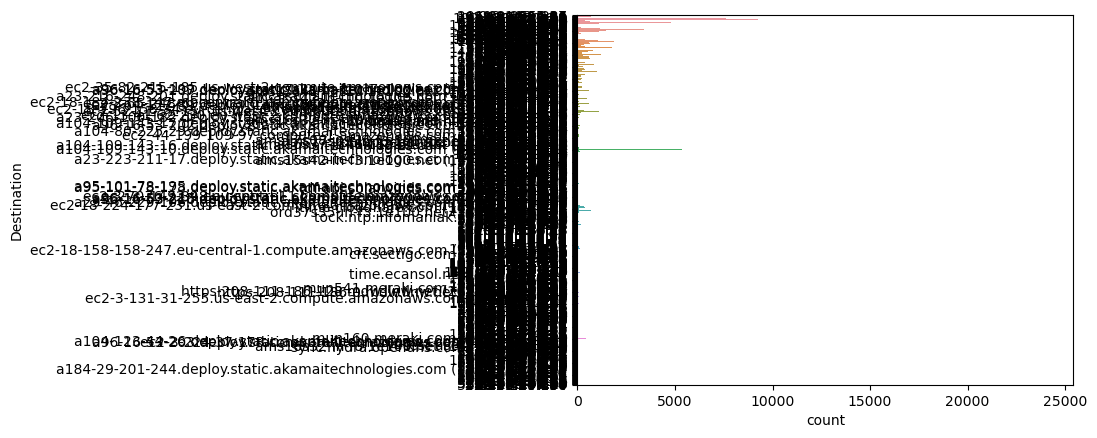

In [87]:
sns.countplot(y='Destination', data=data_csv);

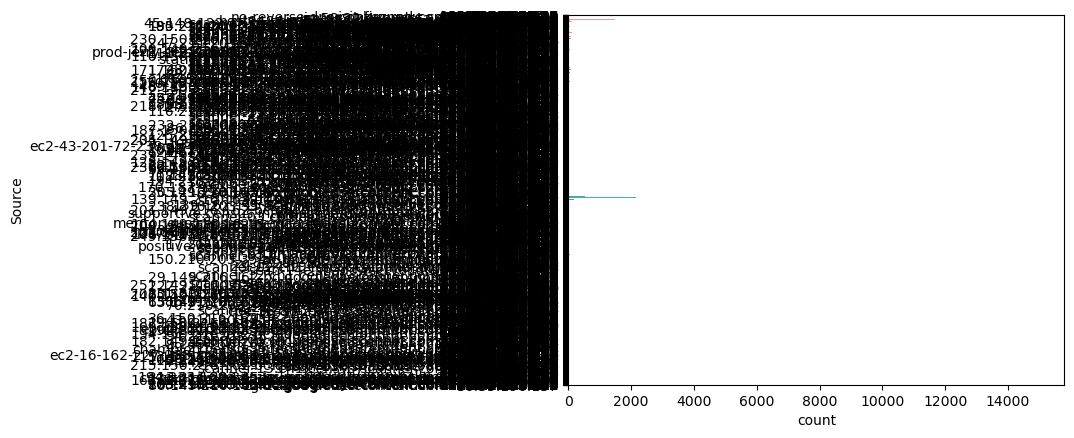

In [88]:
sns.countplot(y='Source', data=data_csv);

In [126]:
s_count = data_csv.Service_ID.value_counts()
s_count

https              141162
tcp-high-ports      26034
domain-udp          19796
http                19475
TCP_5985             7441
                    ...  
TCP_VMWARE_9087         1
TCP_FTPS_11021          1
TCP_8003                1
rip                     1
FW1_omi-sic             1
Name: Service_ID, Length: 185, dtype: int64

In [127]:
sns.barplot(y=s_count.index, x=s_count)
plt.xlabel('Count')
plt.ylabel('Protocol');


In [18]:
tcp_flag_count = data_csv.tcp_flags.value_counts()
tcp_flag_count

tcp_flags
1    170348
2     43911
3     28049
4      9063
5        80
6        69
7        21
8         7
9         6
Name: count, dtype: int64

In [17]:
data_csv.tcp_flags.replace({'SYN':1},inplace=True)
data_csv.tcp_flags.replace({'ACK':2},inplace=True)
data_csv.tcp_flags.replace({'URG':3},inplace=True)
data_csv.tcp_flags.replace({'PSH':4},inplace=True)
data_csv.tcp_flags.replace({'FIN-ACK':5},inplace=True)
data_csv.tcp_flags.replace({'FIN-PUSH-ACK':6},inplace=True)
data_csv.tcp_flags.replace({'PUSH-ACK':7},inplace=True)
data_csv.tcp_flags.replace({'RST-ACK':8},inplace=True)
data_csv.tcp_flags.replace({'RST':9},inplace=True)


In [73]:
sns.barplot(y=tcp_flag_count, x=tcp_flag_count.index)
plt.xlabel('TCP Flag')
plt.ylabel('Count');

In [11]:
connection_type = data_csv.Type.value_counts()
connection_type

Type
Reject    186383
RST        61680
FIN         2965
INT          267
Log          162
CON           97
Name: count, dtype: int64

In [12]:
sns.barplot(y=connection_type.index, x=connection_type)
plt.xlabel('Count')
plt.ylabel('Conn_State');

In [57]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_csv.corr(), linewidths=.5)

<AxesSubplot:>

In [58]:
data_csv.describe()

Rule    Source_Port  Sequence_Number  Destination_Port  \
count  251554.000000  251554.000000    251554.000000     251554.000000   
mean        5.037408   53221.371328        14.847031       3530.227764   
std         1.121459   11861.906475        11.960839      10162.501374   
min         0.000000       0.000000         1.000000          0.000000   
25%         5.270000   50579.000000         4.000000        443.000000   
50%         5.294000   55491.000000        12.000000        443.000000   
75%         5.294000   59518.000000        23.000000        443.000000   
max         5.980000   65535.000000       107.000000      65535.000000   

       Xlate_(NAT)_Source_Port      icmp_type      icmp_code  \
count            251554.000000  251554.000000  251554.000000   
mean               2743.133168       0.171331       0.000052   
std               10077.419889       1.158119       0.025920   
min                   0.000000       0.000000       0.000000   
25%                   0.000000       0.000000       0.000000   
50%                   0.000000       0.000000       0.000000   
75%                   0.000000       0.000000       0.000000   
max               59997.000000       8.000000      13.000000   

       dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
count              2.515540e+05              2.515540e+05   
mean               4.180053e+04             -1.630251e+05   
std                1.976238e+07              1.680391e+07   
min               -1.812774e+09             -1.988219e+09   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                0.000000e+00              0.000000e+00   
max                1.258689e+09              3.054202e+08   

       dce-rpc_interface_uuid-3  dce-rpc_interface_uuid       rpc_prog  \
count              2.515540e+05            2.515540e+05  251554.000000   
mean              -2.806329e+05            3.410454e+05       5.167876   
std                2.018840e+07            2.300898e+07     718.862292   
min               -1.667433e+09            0.000000e+00       0.000000   
25%                0.000000e+00            0.000000e+00       0.000000   
50%                0.000000e+00            0.000000e+00       0.000000   
75%                0.000000e+00            0.000000e+00       0.000000   
max                0.000000e+00            2.001296e+09  100000.000000   

              Log_ID      type_code  
count  251554.000000  251554.000000  
mean        1.609460       1.453998  
std       807.175186       0.960445  
min         0.000000       0.000000  
25%         0.000000       1.000000  
50%         0.000000       2.000000  
75%         0.000000       2.000000  
max    404840.000000       3.000000

In [19]:
data_csv.columns

Index(['Time', 'Destination', 'Rule', 'Interface_Direction', 'Policy_Rule_UID',
       'Type', 'Interface', 'Policy_Date', 'Service_ID', 'Action',
       ...
       'Host_IP', 'Client_Build', 'OS_Version', 'OS_Bits', 'OS_Name',
       'os_edition', 'Auth_Encryption_Methods', 'connection_uid', 'start_time',
       'type_code'],
      dtype='object', length=175)

In [44]:
#data_csv.groupby('Action').max()

TypeError: '>=' not supported between instances of 'str' and 'float'

In [64]:
#data_csv['Action'] = data_csv['Action'].apply(pd.to_numeric,  errors='coerce')
data_csv['icmp_type'] = data_csv['icmp_type'].apply(pd.to_numeric,  errors='coerce')
data_csv['icmp_code'] = data_csv['icmp_code'].apply(pd.to_numeric,  errors='coerce')
data_csv['dce-rpc_interface_uuid-3'] = data_csv['dce-rpc_interface_uuid-3'].apply(pd.to_numeric,  errors='coerce')
#data_csv['tcp_flags'] = data_csv['tcp_flags'].apply(pd.to_numeric,  errors='coerce')
#data_csv['src_uo_name'] = data_csv['src_uo_name'].apply(pd.to_numeric,  errors='coerce')
#data_csv['Source'] = data_csv['Source'].apply(pd.to_numeric,  errors='coerce')

In [60]:
# looking at the correlations of the features.
corr = data_csv.corr()
corr.style


In [39]:
#accept represents as 0
#drop represents as 1


sns.histplot(data_csv.loc[data_csv['type_code'] == 0]['Action'], bins = 20, color='blue')
sns.histplot(data_csv.loc[data_csv['type_code'] == 1]['Action'], bins = 20, color='red')

<AxesSubplot:xlabel='Action', ylabel='Count'>

In [219]:
sns.boxplot(data_csv['type_code'])

<AxesSubplot:>

In [66]:
# data preprocessing - in this, deleting un-necessary tables and null holding table
del data_csv ['Action']
del data_csv ['Time']
del data_csv ['Destination']
del data_csv ['Interface_Direction']
del data_csv ['Type']
del data_csv ['Interface']
del data_csv ['Policy_Date']
del data_csv ['Service_ID']
del data_csv ['Layer_Name']
del data_csv ['Attack_Information']
del data_csv ['Attack_Name']
del data_csv ['Severity']
del data_csv ['Protection_Type']
del data_csv ['Protection_Name']
del data_csv ['source_object']
del data_csv ['Destination_Zone']
del data_csv ['Xlate_(NAT)_Source_IP']
#del data_csv ['tcp_flags']
del data_csv ['icmp']
del data_csv ['src_uo_name']
del data_csv ['Message_Information']
del data_csv ['Protection_ID']
del data_csv ['Product_Family']
del data_csv ['Blade']
del data_csv ['Source_Zone']
del data_csv ['Source']
del data_csv ['Policy_Name']
del data_csv ['Service']
del data_csv ['Origin']
del data_csv ['Policy_Rule_UID']
del data_csv ['ID']
del data_csv ['Host_IP']
del data_csv ['MAC_Address']
del data_csv ['Client_Version']
del data_csv ['Client_Build']
del data_csv ['Office_Mode_IP']
del data_csv ['Device']
del data_csv ['Machine_Name']
del data_csv ['OS_Bits']
del data_csv ['OS_Name']
del data_csv ['os_edition']
del data_csv ['Auth_Encryption_Methods']
del data_csv ['connection_uid']
del data_csv ['start_time']
del data_csv ['Source_OS']
del data_csv ['control_log_type']
del data_csv ['failed_login_factor_num']
del data_csv ['Host_Name']
del data_csv ['Domain_Name']
del data_csv ['os_build']
del data_csv ['Tunnel_Protocol']
del data_csv ['User_Group']
del data_csv ['Login_Option']
del data_csv ['OS_Version']
del data_csv ['dstkeyid']
del data_csv ['ike_ids']
del data_csv ['failure_impact']
del data_csv ['more_sources']
del data_csv ['User_Domain']
del data_csv ['Device_ID']
del data_csv ['Duration']
del data_csv ['Event_Type']
del data_csv ['Mobile_Access_Category']
del data_csv ['msgid']
del data_csv ['Execution']
del data_csv ['ser_agent_kid']
del data_csv ['User_Agent']
del data_csv ['Malware_Family']
del data_csv ['Credential_Access']
del data_csv ['Collection']
del data_csv ['Discovery']
del data_csv ['Initial_Access']
del data_csv ['inspection_settings_log']
del data_csv ['streaming_engine']
del data_csv ['version']
del data_csv ['comment']
del data_csv ['Status']
del data_csv ['Peer_Gateway']
del data_csv ['encryption_failure']
del data_csv ['reject_category']
del data_csv ['encryption_fail_reason']
del data_csv ['Tags']
del data_csv ['description_url']
del data_csv ['reject_id_kid']
del data_csv ['Packet_Capture']
del data_csv ['Scheme']
del data_csv ['validation_log']
del data_csv ['Vpn_Feature_Name']
del data_csv ['dn']
del data_csv ['instruction']
del data_csv ['Email_Session_ID']
del data_csv ['Information']
del data_csv ['Email_Control']
del data_csv ['update_service']
del data_csv ['Vendor_List']
del data_csv ['Session_ID']
del data_csv ['Description']
del data_csv ['fw_message']
del data_csv ['source']
del data_csv ['Received_Bytes']
del data_csv ['packet_capture_time']
del data_csv ['Threat_Profile']
del data_csv ['Suppressed_Logs']
del data_csv ['Sub_Policy_Name']
del data_csv ['Direction_of_Connection']
del data_csv ['log_delay']
del data_csv ['action_reason']
del data_csv ['src_uo_icon']
del data_csv ['lastupdatetime']
del data_csv ['sys_message']
del data_csv ['Performance_Impact']
del data_csv ['sub_policy_uid']
del data_csv ['dst_domain_name']
del data_csv ['dst_uo_name']
del data_csv ['dst_uo_icon']
del data_csv ['tcp_packet_out_of_state']
del data_csv ['Resource']
del data_csv ['Domain']
del data_csv ['Protocol']
del data_csv ['logid']
del data_csv ['first']
del data_csv ['Policy_Management']
del data_csv ['NAT_Additional_Rule_Number']
del data_csv ['nat_rule_uid']
del data_csv ['NAT_Rule_Number']
del data_csv ['Access_Rule_Name']
del data_csv ['id_generated_by_indexer']
del data_csv ['Database_Tag']
del data_csv ['Log_Server_Origin']
del data_csv ['Marker']
del data_csv ['Xlate_(NAT)_Destination_IP']
del data_csv ['User']
del data_csv ['ike']
del data_csv ['cookiei']
del data_csv ['cookier']
del data_csv ['srckeyid']
del data_csv ['Login_TimeStamp']
del data_csv ['session_timeout']
del data_csv ['Threat_Prevention_Rule_ID']
del data_csv ['Interface_Name']
del data_csv ['Xlate_(NAT)_Destination_Port']
del data_csv ['Confidence_Level']
del data_csv ['Industry_Reference']
del data_csv ['Total_Logs']
del data_csv ['Reason']
del data_csv ['Proxied_Source_IP']
del data_csv ['precise_error']
del data_csv ['Method']
del data_csv ['Threat_Prevention_Policy_Date']
del data_csv ['Incident_ID']
del data_csv ['community']
del data_csv ['Client_Name']
del data_csv ['src_domain_name']
del data_csv ['Malware_Action']
del data_csv ['Packet_Capture_Name']
del data_csv ['Threat_Prevention_Policy']
del data_csv ['Methods']
del data_csv ['Scope']
del data_csv ['HTTP_Host']
del data_csv ['Sent_Bytes']

In [67]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rule                      241527 non-null  float64
 1   Source_Port               245851 non-null  float64
 2   Sequence_Number           251554 non-null  int64  
 3   Destination_Port          245851 non-null  float64
 4   Xlate_(NAT)_Source_Port   23532 non-null   float64
 5   tcp_flags                 251554 non-null  int64  
 6   icmp_type                 5623 non-null    float64
 7   icmp_code                 5623 non-null    float64
 8   dce-rpc_interface_uuid-2  59 non-null      float64
 9   dce-rpc_interface_uuid-1  58 non-null      float64
 10  dce-rpc_interface_uuid-3  58 non-null      float64
 11  dce-rpc_interface_uuid    58 non-null      float64
 12  rpc_prog                  13 non-null      float64
 13  Log_ID                    15 non-null      f

In [68]:
data_csv.fillna(0,inplace=True)

In [69]:
#Predictor Variables
x = data_csv[['Rule','Source_Port', 'Sequence_Number', 'Destination_Port', 'Xlate_(NAT)_Source_Port',
       'icmp_type', 'icmp_code', 'dce-rpc_interface_uuid-2', 'dce-rpc_interface_uuid-1', 'dce-rpc_interface_uuid-3',
       'dce-rpc_interface_uuid', 'rpc_prog', 'Log_ID']]

#Target Variable
y = data_csv['type_code']
#y = data_csv.pop('tcp_flags')

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=100)

In [71]:
x_train

Rule  Source_Port  Sequence_Number  Destination_Port  \
135045  5.151      54803.0                1             443.0   
155295  0.000      10104.0                1              23.0   
167830  5.151      57705.0               10             443.0   
205459  5.294      63195.0               10             443.0   
151157  5.294      55046.0               24             443.0   
...       ...          ...              ...               ...   
25384   5.294      58326.0               23             443.0   
183445  5.294      52860.0               16             443.0   
241858  5.294      62245.0               41             443.0   
136915  5.440      64342.0                9            5985.0   
102093  5.530      60564.0               26             443.0   

        Xlate_(NAT)_Source_Port  icmp_type  icmp_code  \
135045                      0.0        0.0        0.0   
155295                      0.0        0.0        0.0   
167830                      0.0        0.0        0.0   
205459                      0.0        0.0        0.0   
151157                      0.0        0.0        0.0   
...                         ...        ...        ...   
25384                       0.0        0.0        0.0   
183445                      0.0        0.0        0.0   
241858                      0.0        0.0        0.0   
136915                      0.0        0.0        0.0   
102093                  46023.0        0.0        0.0   

        dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
135045                       0.0                       0.0   
155295                       0.0                       0.0   
167830                       0.0                       0.0   
205459                       0.0                       0.0   
151157                       0.0                       0.0   
...                          ...                       ...   
25384                        0.0                       0.0   
183445                       0.0                       0.0   
241858                       0.0                       0.0   
136915                       0.0                       0.0   
102093                       0.0                       0.0   

        dce-rpc_interface_uuid-3  dce-rpc_interface_uuid  rpc_prog  Log_ID  
135045                       0.0                     0.0       0.0     0.0  
155295                       0.0                     0.0       0.0     0.0  
167830                       0.0                     0.0       0.0     0.0  
205459                       0.0                     0.0       0.0     0.0  
151157                       0.0                     0.0       0.0     0.0  
...                          ...                     ...       ...     ...  
25384                        0.0                     0.0       0.0     0.0  
183445                       0.0                     0.0       0.0     0.0  
241858                       0.0                     0.0       0.0     0.0  
136915                       0.0                     0.0       0.0     0.0  
102093                       0.0                     0.0       0.0     0.0  

[201243 rows x 13 columns]

In [72]:
x_test

Rule  Source_Port  Sequence_Number  Destination_Port  \
78400   5.294      56907.0               13             443.0   
36135   5.294      64535.0               43             443.0   
199154  5.530      50236.0               43             443.0   
30710   5.294      54450.0               24             443.0   
194655  5.290      50174.0               43           50002.0   
...       ...          ...              ...               ...   
234254  0.000      34425.0                1            4330.0   
47521   5.294      50009.0               15              80.0   
90040   5.294      52760.0               31             443.0   
167985  0.000      58136.0                2           34891.0   
209065  5.460      46470.0                2           20311.0   

        Xlate_(NAT)_Source_Port  icmp_type  icmp_code  \
78400                       0.0        0.0        0.0   
36135                       0.0        0.0        0.0   
199154                  29713.0        0.0        0.0   
30710                       0.0        0.0        0.0   
194655                      0.0        0.0        0.0   
...                         ...        ...        ...   
234254                      0.0        0.0        0.0   
47521                       0.0        0.0        0.0   
90040                       0.0        0.0        0.0   
167985                      0.0        0.0        0.0   
209065                      0.0        0.0        0.0   

        dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
78400                        0.0                       0.0   
36135                        0.0                       0.0   
199154                       0.0                       0.0   
30710                        0.0                       0.0   
194655                       0.0                       0.0   
...                          ...                       ...   
234254                       0.0                       0.0   
47521                        0.0                       0.0   
90040                        0.0                       0.0   
167985                       0.0                       0.0   
209065                       0.0                       0.0   

        dce-rpc_interface_uuid-3  dce-rpc_interface_uuid  rpc_prog  Log_ID  
78400                        0.0                     0.0       0.0     0.0  
36135                        0.0                     0.0       0.0     0.0  
199154                       0.0                     0.0       0.0     0.0  
30710                        0.0                     0.0       0.0     0.0  
194655                       0.0                     0.0       0.0     0.0  
...                          ...                     ...       ...     ...  
234254                       0.0                     0.0       0.0     0.0  
47521                        0.0                     0.0       0.0     0.0  
90040                        0.0                     0.0       0.0     0.0  
167985                       0.0                     0.0       0.0     0.0  
209065                       0.0                     0.0       0.0     0.0  

[50311 rows x 13 columns]

In [73]:
y_train

135045    1
155295    0
167830    1
205459    0
151157    0
         ..
25384     0
183445    0
241858    0
136915    0
102093    0
Name: type_code, Length: 201243, dtype: int64

In [74]:
y_test

78400     0
36135     0
199154    0
30710     0
194655    0
         ..
234254    0
47521     0
90040     0
167985    0
209065    0
Name: type_code, Length: 50311, dtype: int64

In [75]:
# 1st Model: XGBoost Classifier

model = xgb.XGBClassifier(n_estimators= 200)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43660
           1       0.89      0.98      0.93      3969
           2       0.94      0.82      0.87       770
           3       0.82      0.84      0.83       750
           4       0.91      0.66      0.77       424
           5       1.00      1.00      1.00       607
           6       0.00      0.00      0.00       116
           7       1.00      1.00      1.00        15

    accuracy                           0.99     50311
   macro avg       0.82      0.79      0.80     50311
weighted avg       0.98      0.99      0.98     50311

accuracy:   0.99


/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


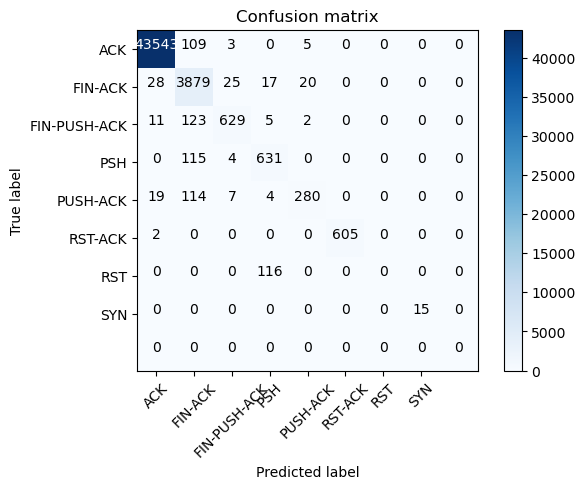

In [77]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4,5,6,7,8])

plot_confusion_matrix(cm,classes=['ACK','FIN-ACK','FIN-PUSH-ACK','PSH','PUSH-ACK','RST-ACK','RST','SYN'])

In [78]:
xgb_feature = model.feature_importances_
xgb_features = xgb_feature.tolist()

In [79]:
# 2nd Model: GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(x_train,y_train)
y_pred = gbdt.predict(x_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     43660
           1       0.73      0.89      0.80      3969
           2       0.76      0.47      0.58       770
           3       0.21      0.21      0.21       750
           4       0.62      0.21      0.31       424
           5       0.81      0.73      0.77       607
           6       0.20      0.97      0.33       116
           7       0.00      0.00      0.00        15

    accuracy                           0.93     50311
   macro avg       0.54      0.56      0.50     50311
weighted avg       0.94      0.93      0.94     50311

accuracy:   0.93


/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4,5,6,7,8])

plot_confusion_matrix(cm,classes=['ACK','FIN-ACK','FIN-PUSH-ACK','PSH','PUSH-ACK','RST-ACK','RST','SYN'])

Confusion matrix, without normalization


In [81]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()



In [82]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     43660
           1       1.00      0.00      0.00      3969
           2       1.00      0.01      0.01       770
           3       0.71      0.44      0.55       750
           4       0.00      0.00      0.00       424
           5       1.00      0.16      0.28       607
           6       0.00      0.00      0.00       116
           7       0.00      0.00      0.00        15

    accuracy                           0.88     50311
   macro avg       0.57      0.20      0.22     50311
weighted avg       0.88      0.88      0.82     50311

accuracy:   0.88


/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4,5,6,7,8])

plot_confusion_matrix(cm,classes=['ACK','FIN-ACK','FIN-PUSH-ACK','PSH','PUSH-ACK','RST-ACK','RST','SYN'])

Confusion matrix, without normalization


In [84]:
# 3rd Model: LightGBM Classifier
lgb = LGBMClassifier(boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)

LGB_C = lgb.fit(x_train, y_train)

y_pred = LGB_C.predict(x_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 201243, number of used features: 10
[LightGBM] [Info] Start training from score -0.141798
[LightGBM] [Info] Start training from score -2.539768
[LightGBM] [Info] Start training from score -4.179908
[LightGBM] [Info] Start training from score -4.205568
[LightGBM] [Info] Start training from score -4.776241
[LightGBM] [Info] Start training from score -4.418269
[LightGBM] [Info] Start training from score -6.070231
[LightGBM] [Info] Start training from score -8.069134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [85]:
lgb_feature = lgb.feature_importances_
lgb_feature

array([4858, 6449, 4890, 3656, 1521,  197,    0,    0,    1,    2,    0,
          0,    0], dtype=int32)

In [86]:
lgb_features = lgb_feature.tolist()



In [87]:
#Plotting ensemble Feature Importance
cols = x_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    
    'Gradient Boost feature importances': gbdt_features,
    'XG Boost feature importances': xgb_features, 
    'LGBM feature importances': lgb_features
                                   
    })
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

TypeError: can only concatenate str (not "float") to str

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': x_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()

KeyError: 'mean'

#############################################
######-ml_model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  98.17%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43660
           1       0.91      0.92      0.91      3969
           2       0.82      0.84      0.83       770
           3       0.75      0.85      0.79       750
           4       0.75      0.68      0.71       424
           5       1.00      1.00      1.00       607
           6       0.00      0.00      0.00       116
           7       1.00      1.00      1.00        15

    accuracy                           0.98     50311
   macro avg       0.78      0.78      0.78     50311
weighted avg       0.98      0.98      0.98     50311

             Confusion_matrix 


###################- End -###################
#############################################
######-ml_model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  97.91%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43660
           1       0.88      0.92      0.90      3969
           2       0.84      0.76      0.79       770
           3       0.74      0.84      0.78       750
           4       0.75      0.59      0.66       424
           5       1.00      1.00      1.00       607
           6       0.00      0.00      0.00       116
           7       1.00      1.00      1.00        15

    accuracy                           0.98     50311
   macro avg       0.77      0.76      0.77     50311
weighted avg       0.98      0.98      0.98     50311

             Confusion_matrix 


/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###################- End -###################
#############################################
######-ml_model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  93.22%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43660
           1       0.74      0.72      0.73      3969
           2       0.61      0.40      0.48       770
           3       0.72      0.70      0.71       750
           4       0.59      0.26      0.36       424
           5       0.85      0.82      0.84       607
           6       0.00      0.00      0.00       116
           7       0.68      1.00      0.81        15

    accuracy                           0.93     50311
   macro avg       0.64      0.61      0.61     50311
weighted avg       0.93      0.93      0.93     50311

             Confusion_matrix 


###################- End -###################
#############################################
######-ml_model => <class 'lightgbm.sklearn.LGBMClassifier'> 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 201243, number of used features: 10
[LightGBM] [Info] Start training from score -0.141798
[LightGBM] [Info] Start training from score -2.539768
[LightGBM] [Info] Start training from score -4.179908
[LightGBM] [Info] Start training from score -4.205568
[LightGBM] [Info] Start training from score -4.776241
[LightGBM] [Info] Start training from score -4.418269
[LightGBM] [Info] Start training from score -6.070231
[LightGBM] [Info] Start training from score -8.069134
[LightGBM] [Warning] No further splits with positive gain,

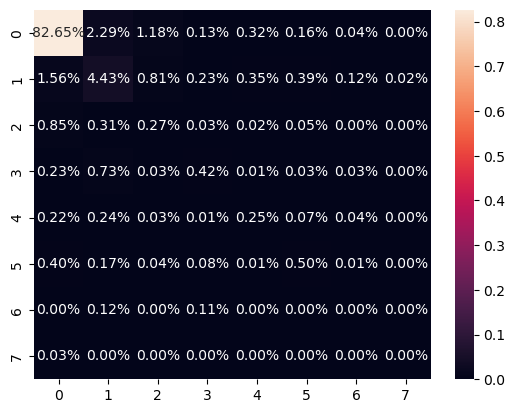

###################- End -###################
#############################################
######-ml_model => <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 
Test Accuracy :  97.68%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     43660
           1       0.82      0.98      0.89      3969
           2       0.98      0.64      0.77       770
           3       0.82      0.78      0.80       750
           4       0.90      0.56      0.69       424
           5       0.99      0.99      0.99       607
           6       0.00      0.00      0.00       116
           7       1.00      1.00      1.00        15

    accuracy                           0.98     50311
   macro avg       0.81      0.74      0.77     50311
weighted avg       0.98      0.98      0.98     50311

             Confusion_matrix 


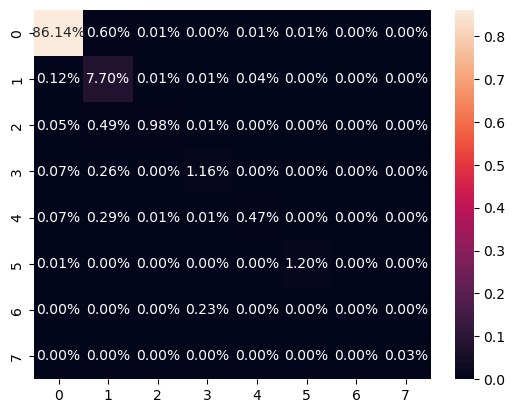

###################- End -###################
#############################################
######-ml_model => <class 'xgboost.sklearn.XGBClassifier'> 
Test Accuracy :  98.54%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43660
           1       0.89      0.98      0.93      3969
           2       0.94      0.80      0.87       770
           3       0.82      0.84      0.83       750
           4       0.95      0.66      0.77       424
           5       1.00      1.00      1.00       607
           6       0.00      0.00      0.00       116
           7       1.00      1.00      1.00        15

    accuracy                           0.99     50311
   macro avg       0.82      0.78      0.80     50311
weighted avg       0.98      0.99      0.98     50311

             Confusion_matrix 


/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###################- End -###################
#############################################
######-ml_model => <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 
Test Accuracy :  87.65%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     43660
           1       1.00      0.00      0.00      3969
           2       1.00      0.01      0.01       770
           3       0.72      0.43      0.54       750
           4       0.00      0.00      0.00       424
           5       0.81      0.23      0.36       607
           6       0.00      0.00      0.00       116
           7       0.00      0.00      0.00        15

    accuracy                           0.88     50311
   macro avg       0.55      0.21      0.23     50311
weighted avg       0.88      0.88      0.82     50311

             Confusion_matrix 


/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


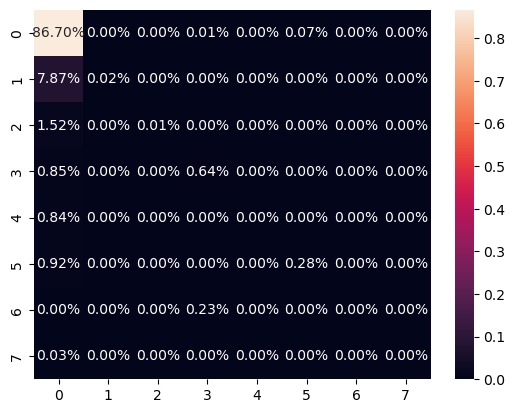

###################- End -###################


In [94]:
ml_models = [DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LGBMClassifier,GradientBoostingClassifier,XGBClassifier,MLPClassifier]
accuracy_test=[]

for m in ml_models:
    print('#############################################')
    print('######-ml_model =>\033[07m {} \033[0m'.format(m))
    ml_model_ = m()
    ml_model_.fit(x_train, y_train)
    pred = ml_model_.predict(x_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')


In [95]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'KNeighbors Classifier','LGBMClassifier','GradientBoostingClassifier','XGBClassifier','MLPClassifier'],
                      "Accuracy":accuracy_test})

In [96]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 3,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

plt.xlabel("Models", size=12)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [ ]:
#

In [97]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
x, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
n_classes = len(np.unique(y))
x = np.concatenate([x, random_state.randn(n_samples, 13 * n_features)], axis=1)
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(x, y, test_size=0.2, stratify=y, random_state=100)

In [98]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(30, 3)

In [100]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

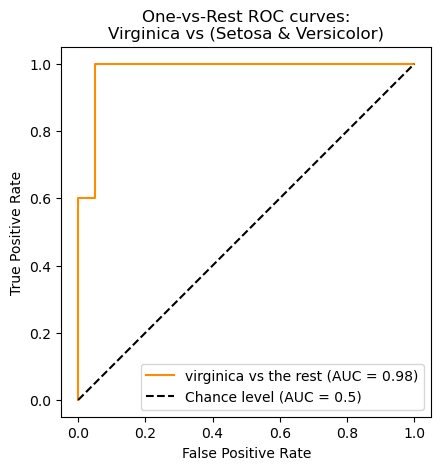

In [101]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [102]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.98


In [103]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.98


In [104]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.99


In [105]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.99


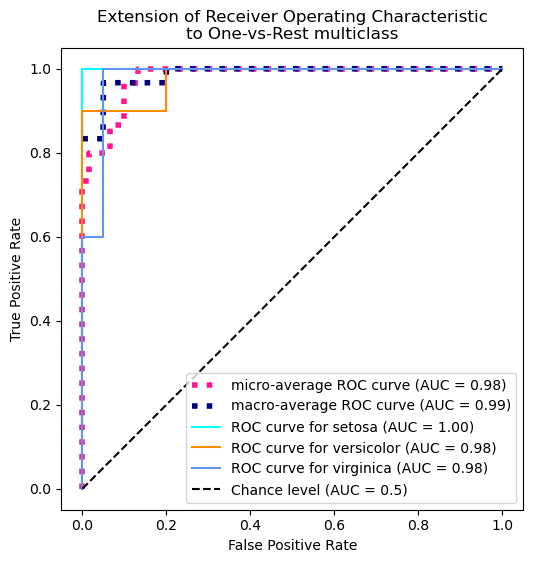

In [106]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

[('setosa', 'versicolor'), ('setosa', 'virginica'), ('versicolor', 'virginica')]


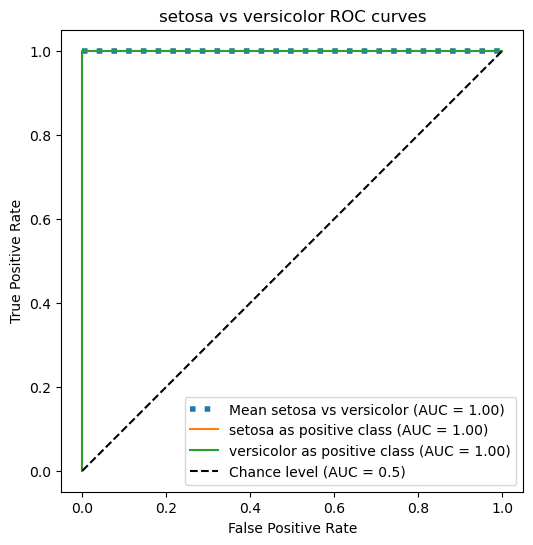

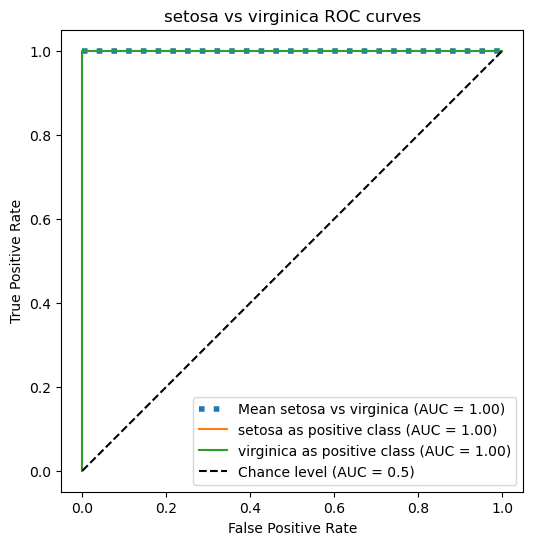

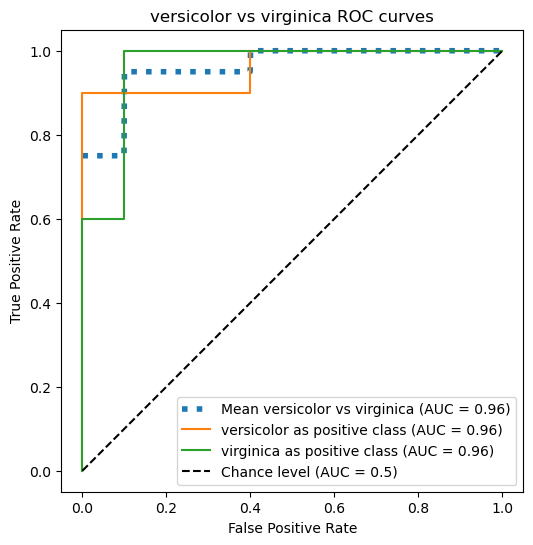

Macro-averaged One-vs-One ROC AUC score:
0.99


In [107]:
from itertools import combinations

pair_list = list(combinations(np.unique(y), 2))
print(pair_list)
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = y_test == label_a
    b_mask = y_test == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
    )
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{target_names[idx_a]} vs {label_b} ROC curves")
    plt.legend()
    plt.show()

print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")

In [108]:
macro_roc_auc_ovo = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.99


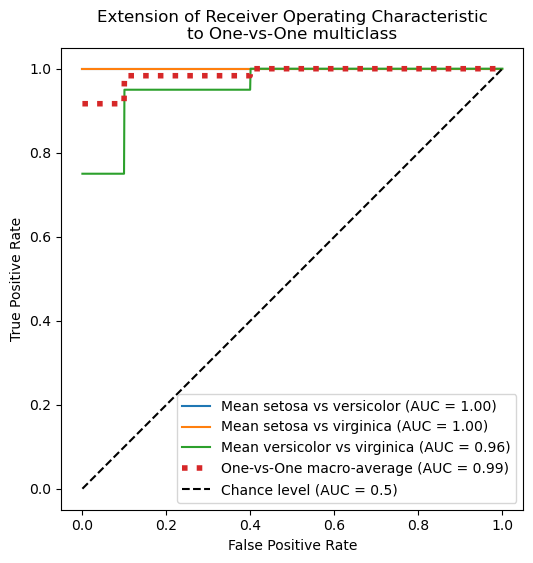

In [109]:
ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

plt.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-One multiclass")
plt.legend()
plt.show()

In [396]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(n_samples=80_000, random_state=200)

x_full_train, x_test, y_full_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=200
)
x_train_ensemble, x_train_linear, y_train_ensemble, y_train_linear = train_test_split(
    x_full_train, y_full_train, test_size=0.5, random_state=200
)

In [397]:
n_estimators = 10
max_depth = 3

In [398]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=200
)
random_forest.fit(x_train_ensemble, y_train_ensemble)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=200
)
_ = gradient_boosting.fit(x_train_ensemble, y_train_ensemble)

In [280]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [281]:
label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [282]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [283]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

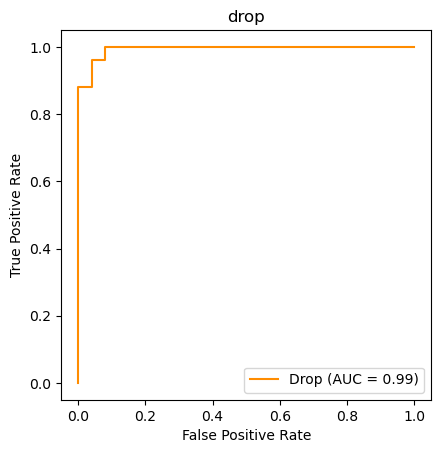

In [284]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"Drop",
    color="darkorange",
    #plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("drop")
plt.legend()
plt.show()

In [ ]:
#=========RF & GB - ROC&AUC

In [399]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(n_samples=20_00, random_state=100)

x_full_train, x_test, y_full_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=10
)
x_train_ensemble, x_train_linear, y_train_ensemble, y_train_linear = train_test_split(
    x_full_train, y_full_train, test_size=0.2, random_state=100
)

In [400]:
n_estimators = 10
max_depth = 3

In [403]:
# random forest and GB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)
random_forest.fit(x_train_ensemble, y_train_ensemble)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)
_ = gradient_boosting.fit(x_train_ensemble, y_train_ensemble)



In [404]:
from sklearn.ensemble import RandomTreesEmbedding

random_tree_embedding = RandomTreesEmbedding(
    n_estimators=n_estimators, max_depth=max_depth, random_state=0
)

In [405]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

rt_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=1000))
rt_model.fit(x_train_linear, y_train_linear)

Pipeline(steps=[('randomtreesembedding',
                 RandomTreesEmbedding(max_depth=3, n_estimators=10,
                                      random_state=0)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [406]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


def rf_apply(x, model):
    return model.apply(x)


rf_leaves_yielder = FunctionTransformer(rf_apply, kw_args={"model": random_forest})

rf_model = make_pipeline(
    rf_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000),
)
rf_model.fit(x_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function rf_apply at 0x7f6ceb7fb1c0>,
                                     kw_args={'model': RandomForestClassifier(max_depth=3,
                                                                              n_estimators=10,
                                                                              random_state=10)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [407]:
def gbdt_apply(x, model):
    return model.apply(x)[:, :, 0]


gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gradient_boosting}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000),
)
gbdt_model.fit(x_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function gbdt_apply at 0x7f6ceb85e830>,
                                     kw_args={'model': GradientBoostingClassifier(n_estimators=10,
                                                                                  random_state=10)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

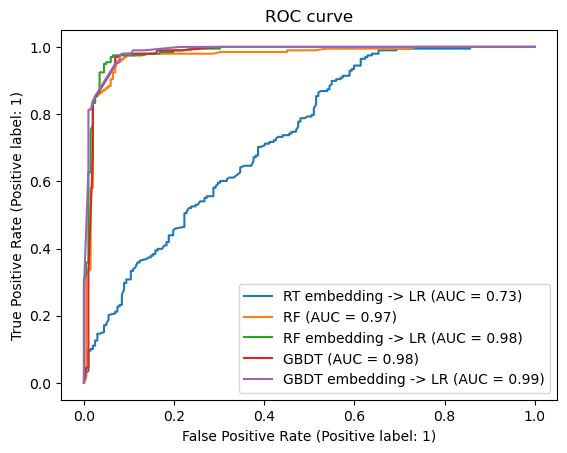

In [408]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("RT embedding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBDT", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, x_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")

In [409]:
fig, ax = plt.subplots()
for name, pipeline in models:
    model_displays[name].plot(ax=ax)

ax.set_xlim(0, 0.2)
ax.set_ylim(0.8, 1)
_ = ax.set_title("ROC curve (zoomed in at top left)")

In [410]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=100)

In [412]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [413]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


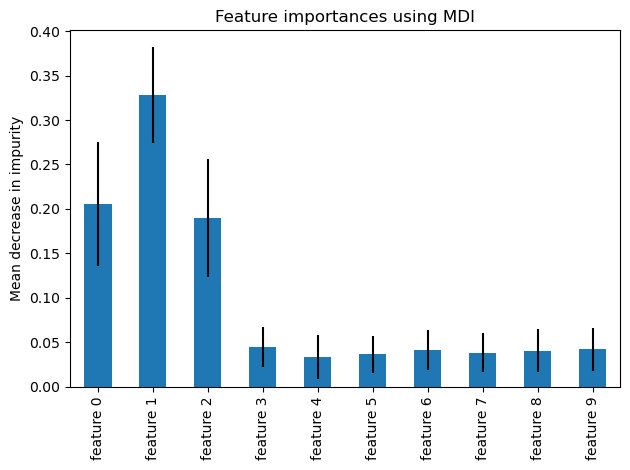

In [414]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [415]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, x_test, y_test, n_repeats=10, random_state=100, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.861 seconds


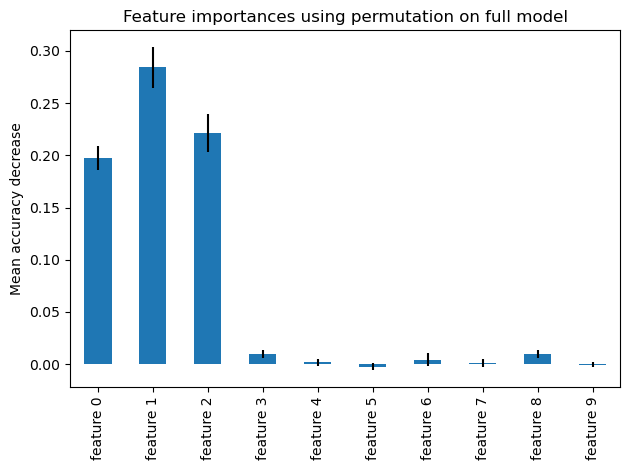

In [416]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [298]:
#MLP hyper parameter fine tunining
# Method for evaluating results
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [299]:
len(x.columns)

13

In [300]:
def predict( x_train, y_train, **kwargs):
    mlp = MLPClassifier(**kwargs, random_state=1)
    mlp.fit(x_train, y_train)
    return mlp.predict(x_test)

In [301]:
def calculateScoresNoOutput(y_test, predictions):
    accuracy = 100*accuracy_score(y_test, predictions)
    precision = 100*precision_score(y_test, predictions,average='weighted')
    recall = 100*recall_score(y_test, predictions,average='weighted')
    f1 = 100*f1_score(y_test, predictions,average='weighted')
    return {'Accuracy':accuracy, 'F1': f1}

In [302]:
from sklearn import preprocessing

In [303]:
# Let's try the different solvers
solvers = ['lbfgs']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Solver  Accuracy        F1
0  lbfgs  0.129196  0.154099

In [ ]:
#lbfgs has better convergence on relatively small datasets.

#(But what is algorithm convergence?

#(In simple words. If the error of solving is ranging within very small range (i.e., it is almost not changing), then that means the algorithm reached the solution (not necessary to be the best solution as it might be stuck at what so-called "local Optima").

#On the other hand, if the error is varying noticeably (even if the error is relatively small [like in your case the score was good], but rather the differences between the errors per iteration is greater than some tolerance) then we say the algorithm did not converge.

#Now, you need to know that Scikit-Learn API sometimes provides the user the option to specify the maximum number of iterations the algorithm should take while it's searching for the solution in an iterative manner:)

In [304]:
solvers = ['sgd']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Solver   Accuracy         F1
0    sgd  78.704458  71.211647

In [305]:
solvers = ['adam']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Solver   Accuracy         F1
0   adam  86.454255  84.913012

In [291]:
#Looks like the adam solver is the best, with highest accuray and F1 scores. We'll use that from now on.

In [306]:
# Generalise attempting different values
def try_different_values(values, column_name, x_train, y_train, **kwargs):
    results = []
    for value in values:
        kwargs[column_name] = value
        result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, **kwargs))
        result_dict[column_name] = value
        results.append(result_dict)
    df = pd.DataFrame(results, columns = [column_name,'Accuracy', 'F1'])
    return df

In [307]:
activations = ['identity', 'logistic', 'tanh', 'relu']
try_different_values(activations, 'activation', x_train, y_train, solver='adam')

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classifica

activation   Accuracy         F1
0   identity  83.842500  80.796658
1   logistic  85.541929  83.347523
2       tanh  86.066665  84.249238
3       relu  86.454255  84.913012

In [ ]:
#Another improvement using the logistic activation. Let's try adjusting the regularisation

In [309]:
alphas = []
for i in range(5,10):
     alphas.append(1/(2**i))
alpha_df = try_different_values(alphas, 'alpha', x_train, y_train, solver='adam', activation='logistic')

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classifica

<AxesSubplot:xlabel='alpha'>

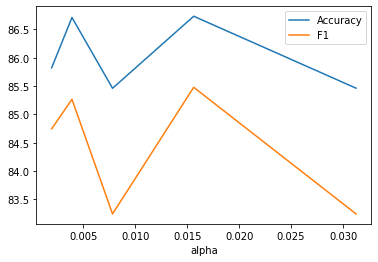

In [310]:
alpha_df.set_index('alpha', inplace=True)
alpha_df.plot()

In [311]:
print(alpha_df.loc[alpha_df['Accuracy'].idxmax()])
print(alpha_df.loc[alpha_df['F1'].idxmax()])

Accuracy    86.732524
F1          85.477749
Name: 0.015625, dtype: float64
Accuracy    86.732524
F1          85.477749
Name: 0.015625, dtype: float64


In [312]:
# The regularisation parameter doesn't seem to change much. Let's save it and try the batch size
# Store alpha
alpha=0.0001


In [ ]:
batch_sizes = [2 ** e for e in range(10)]
batch_df = try_different_values(batch_sizes, 'batch_size', x_train, y_train, solver='adam', activation='logistic', alpha=alpha)

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res